In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from scipy.stats import linregress

## Data Analysis

1. **TAN (Invesco Solar ETF):**
   TAN focuses on companies involved in the solar energy industry. It includes solar panel manufacturers, developers, and other related companies. There may be a positive correlation with Tesla stock due to the shared focus on renewable energy.

2. **LIT (Global X Lithium & Battery Tech ETF):**
   LIT invests in companies involved in lithium mining and battery technology. It includes lithium producers, battery manufacturers, and electric vehicle companies. There could be a positive correlation with Tesla stock as lithium is a key component in electric vehicle batteries.

3. **KARS (KraneShares Electric Vehicles and Future Mobility Index ETF):**
   KARS targets companies involved in autonomous and electric vehicle technology, including manufacturers, suppliers, and technology developers. There might be a positive correlation with Tesla stock given their shared focus on electric vehicles and future mobility solutions.

4. **XOP (SPDR S&P Oil & Gas Exploration & Production ETF):**
   XOP tracks companies engaged in the exploration and production of oil and natural gas. While it focuses on traditional energy sources, there might be an inverse correlation with Tesla stock due to Tesla's emphasis on renewable energy and potential competition with traditional automotive companies.

5. **HAIL (SPDR S&P Kensho Smart Mobility ETF):**
   HAIL is related to the autonomous and electric vehicle industry, investing in companies developing smart mobility technologies such as autonomous vehicles, drones, and electric vehicles. There might be a positive correlation with Tesla stock as both focus on innovative transportation solutions.

6. **IXC (iShares Global Energy ETF):**
   IXC covers global energy sector companies, including oil, gas, and renewable energy firms. While it includes a diverse range of energy companies, there might be a mixed correlation with Tesla stock depending on the weight of renewable energy companies in the ETF.

7. **FAN (First Trust Global Wind Energy ETF):**
   FAN focuses on wind energy companies, including wind turbine manufacturers, developers, and operators. There might be a positive correlation with Tesla stock as both are part of the renewable energy sector.

8. **PICK (iShares MSCI Global Metals & Mining Producers ETF):**
   PICK invests in global metals and mining companies involved in the extraction and production of metals and minerals. While it is not directly related to Tesla's core business, there might be some indirect correlation based on shared demand for metals used in electric vehicle batteries and other components.

9. **FCG (First Trust Natural Gas ETF):**
   FCG targets natural gas exploration and production companies. There might be an inverse correlation with Tesla stock as Tesla's focus on electric vehicles and renewable energy could lead to reduced demand for traditional fossil fuels like natural gas.

In [2]:
etf_names = ["TAN", "LIT", "KARS", "XOP", "HAIL", "IXC", "FAN", "PICK", "FCG", "TSLA"]
file_names = [f"Data/{ticker}.csv" for ticker in etf_names]
columns_to_drop = ["High", "Low", "Dividends", "Volume", "Stock Splits", "Capital Gains"]
cols = [f"Return_{ticker}" for ticker in etf_names]
cols_2 = [f"Rolling_Mean_{ticker}" for ticker in etf_names]

In [3]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

for symbol in etf_names:
    stock = yf.Ticker(symbol)
    
    historical_data = stock.history(start=start_date, end=end_date)
    
    filename = f"Data/{symbol}.csv"
    historical_data.to_csv(filename)

In [4]:
dfs = []
window_size = 2
for file_name, etf_name in zip(file_names, etf_names):
    df = pd.read_csv(file_name).drop(columns = columns_to_drop, errors='ignore')
    df["Return"] = (df["Close"] - df["Open"])/df["Open"] * 100
    df['Rolling_Mean'] = df['Return'].rolling(window=window_size).mean()
    df.rename(columns={'Open': 'Open_' + etf_name, 'Close': 'Close_' + etf_name, 'Return': 'Return_' + etf_name, "Rolling_Mean": "Rolling_Mean_" + etf_name}, inplace=True)
    dfs.append(df)

etfs = dfs[0]
for df, etf_name in zip(dfs[1:], etf_names[1:]):
    etfs = pd.merge(etfs, df, on="Date", how="outer", suffixes=('', '_' + etf_name))
    
tsla = dfs[-1]


In [5]:
etfs

Date   Open_TAN  Close_TAN  Return_TAN  \
0     2020-01-02 00:00:00-05:00  31.290924  31.879812    1.881978   
1     2020-01-03 00:00:00-05:00  31.620301  31.670206    0.157826   
2     2020-01-06 00:00:00-05:00  31.270961  31.390736    0.383022   
3     2020-01-07 00:00:00-05:00  31.380754  31.670206    0.922389   
4     2020-01-08 00:00:00-05:00  31.670208  32.009567    1.071542   
...                         ...        ...        ...         ...   
1078  2024-04-16 00:00:00-04:00  40.110001  39.740002   -0.922461   
1079  2024-04-17 00:00:00-04:00  40.099998  40.099998    0.000000   
1080  2024-04-18 00:00:00-04:00  40.220001  39.700001   -1.292890   
1081  2024-04-19 00:00:00-04:00  39.560001  39.590000    0.075831   
1082  2024-04-22 00:00:00-04:00  39.720001  39.950001    0.579052   

      Rolling_Mean_TAN   Open_LIT  Close_LIT  Return_LIT  Rolling_Mean_LIT  \
0                  NaN  26.907333  26.907333    0.000000               NaN   
1             1.019902  26.557634  26.538206   -0.073155         -0.036577   
2             0.270424  26.324503  26.654774    1.254613          0.590729   
3             0.652705  26.839336  27.014185    0.651467          0.953040   
4             0.996965  26.343932  26.450783    0.405600          0.528533   
...                ...        ...        ...         ...               ...   
1078         -1.838478  42.860001  42.740002   -0.279979         -0.856353   
1079         -0.461230  43.189999  43.150002   -0.092607         -0.186293   
1080         -0.646445  43.209999  42.910000   -0.694282         -0.393445   
1081         -0.608530  42.320000  42.419998    0.236291         -0.228995   
1082          0.327442  42.080002  42.330002    0.594106          0.415199   

      Open_KARS  ...  Return_PICK  Rolling_Mean_PICK   Open_FCG  Close_FCG  \
0     22.005931  ...    -0.431461                NaN  10.634085  10.380893   
1     21.905113  ...    -0.739493          -0.585477  10.695199  10.599161   
2     21.877616  ...     0.547570          -0.095962  10.712663  10.703932   
3     22.005931  ...     0.684231           0.615900  10.712662  10.878547   
4     22.235063  ...     1.295599           0.989915  10.843624  10.450739   
...         ...  ...          ...                ...        ...        ...   
1078  20.969999  ...    -0.608619          -1.025465  27.280001  27.250000   
1079  21.200001  ...    -1.109056          -0.858838  27.200001  27.049999   
1080  21.360001  ...    -0.116494          -0.612775  27.190001  26.980000   
1081  21.139999  ...     0.187349           0.035427  26.910000  27.280001   
1082  20.990000  ...     0.140881           0.164115  27.139999  27.480000   

      Return_FCG  Rolling_Mean_FCG   Open_TSLA  Close_TSLA  Return_TSLA  \
0      -2.380952               NaN   28.299999   28.684000     1.356893   
1      -0.897956         -1.639454   29.366667   29.534000     0.569808   
2      -0.081501         -0.489729   29.364668   30.102667     2.513221   
3       1.548489          0.733494   30.760000   31.270666     1.660162   
4      -3.623187         -1.037349   31.580000   32.809334     3.892761   
...          ...               ...         ...         ...          ...   
1078   -0.109973         -0.860862  156.740005  157.110001     0.236057   
1079   -0.551476         -0.330725  157.639999  155.449997    -1.389243   
1080   -0.772346         -0.661911  151.250000  149.929993    -0.872732   
1081    1.374957          0.301305  148.970001  147.050003    -1.288849   
1082    1.252764          1.313860  140.559998  142.050003     1.060049   

      Rolling_Mean_TSLA  
0                   NaN  
1              0.963351  
2              1.541514  
3              2.086692  
4              2.776462  
...                 ...  
1078          -2.454813  
1079          -0.576593  
1080          -1.130987  
1081          -1.080790  
1082          -0.114400  

[1083 rows x 41 columns]

In [6]:
tsla

Date   Open_TSLA  Close_TSLA  Return_TSLA  \
0     2020-01-02 00:00:00-05:00   28.299999   28.684000     1.356893   
1     2020-01-03 00:00:00-05:00   29.366667   29.534000     0.569808   
2     2020-01-06 00:00:00-05:00   29.364668   30.102667     2.513221   
3     2020-01-07 00:00:00-05:00   30.760000   31.270666     1.660162   
4     2020-01-08 00:00:00-05:00   31.580000   32.809334     3.892761   
...                         ...         ...         ...          ...   
1078  2024-04-16 00:00:00-04:00  156.740005  157.110001     0.236057   
1079  2024-04-17 00:00:00-04:00  157.639999  155.449997    -1.389243   
1080  2024-04-18 00:00:00-04:00  151.250000  149.929993    -0.872732   
1081  2024-04-19 00:00:00-04:00  148.970001  147.050003    -1.288849   
1082  2024-04-22 00:00:00-04:00  140.559998  142.050003     1.060049   

      Rolling_Mean_TSLA  
0                   NaN  
1              0.963351  
2              1.541514  
3              2.086692  
4              2.776462  
...                 ...  
1078          -2.454813  
1079          -0.576593  
1080          -1.130987  
1081          -1.080790  
1082          -0.114400  

[1083 rows x 5 columns]

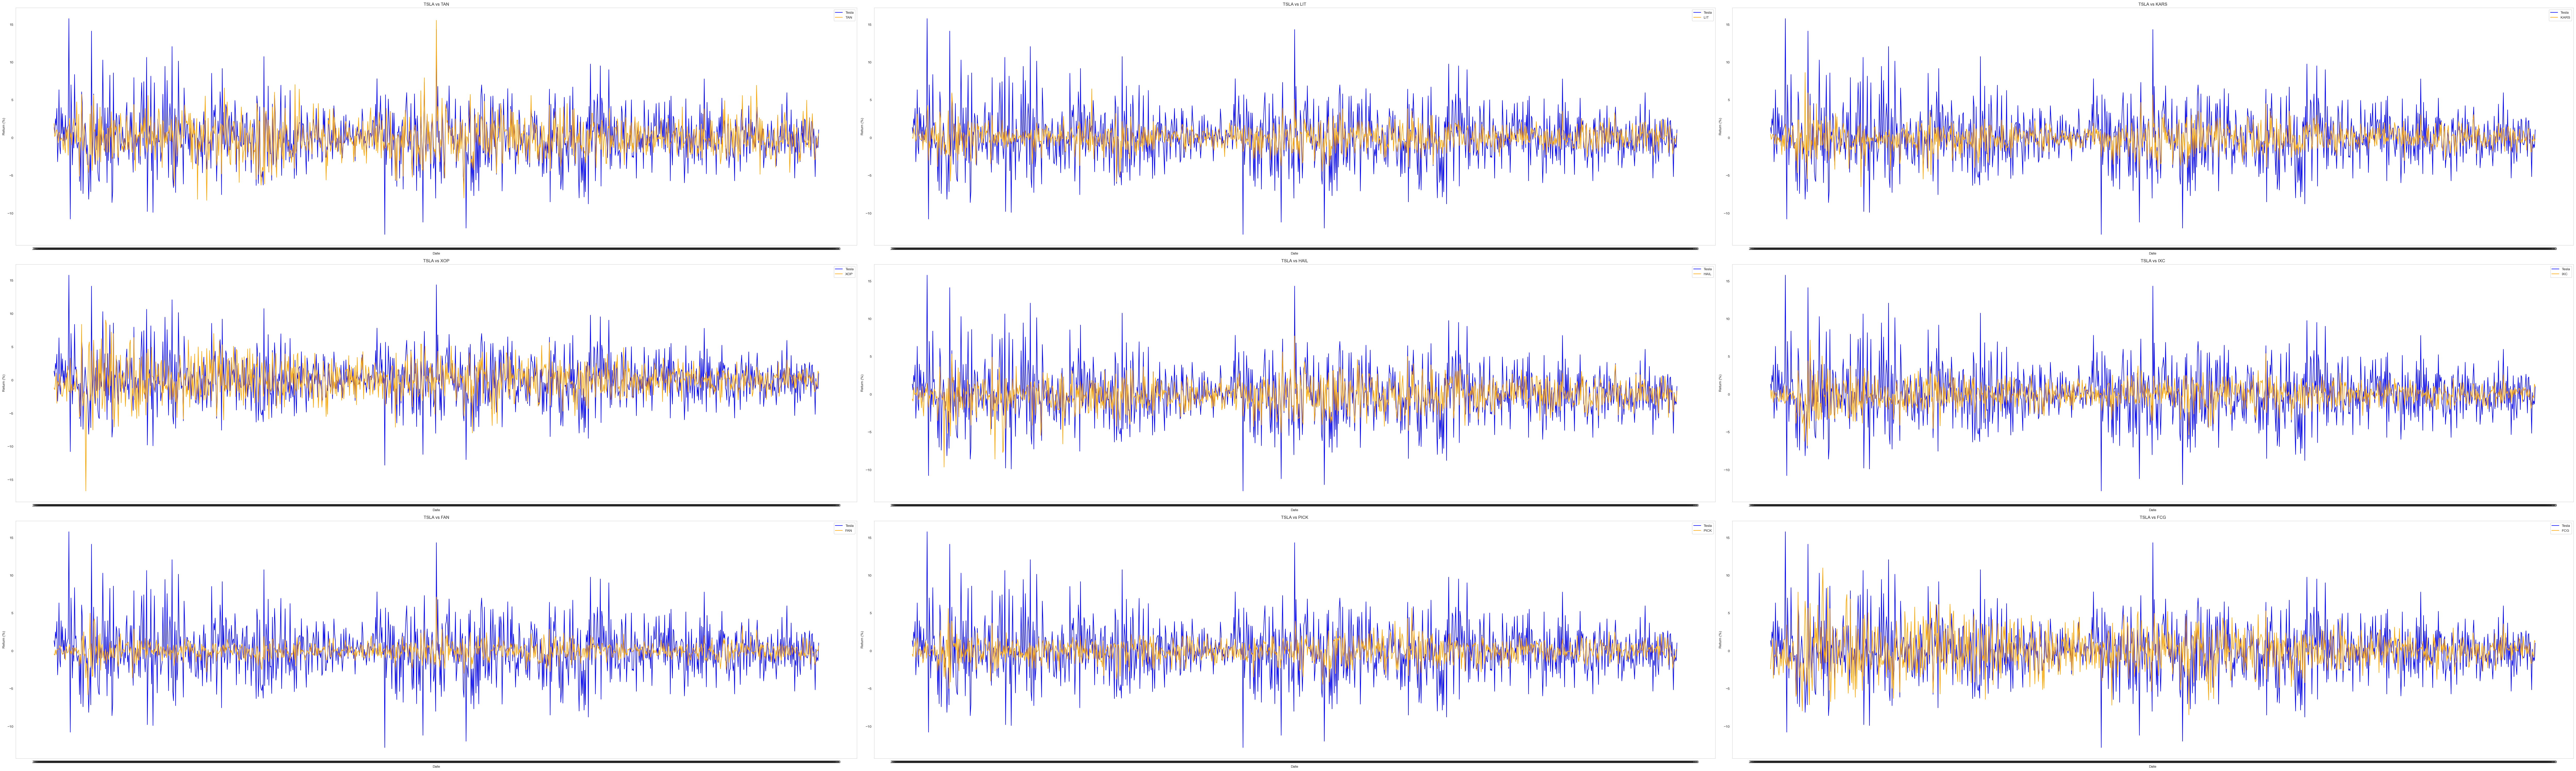

In [7]:
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(100, 30))

axs = axs.flatten()

for i, etf_name in enumerate(etf_names[:-1]):
    axs[i].plot(tsla['Date'], tsla['Return_TSLA'], label='Tesla', color='blue', alpha=1)
    axs[i].plot(etfs['Date'], etfs[f'Return_{etf_name}'], label=etf_name, color='orange', alpha=1)
    
    axs[i].set_title(f'TSLA vs {etf_name}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Return (%)')
    axs[i].legend()
    axs[i].grid(False)

plt.tight_layout()
plt.show()


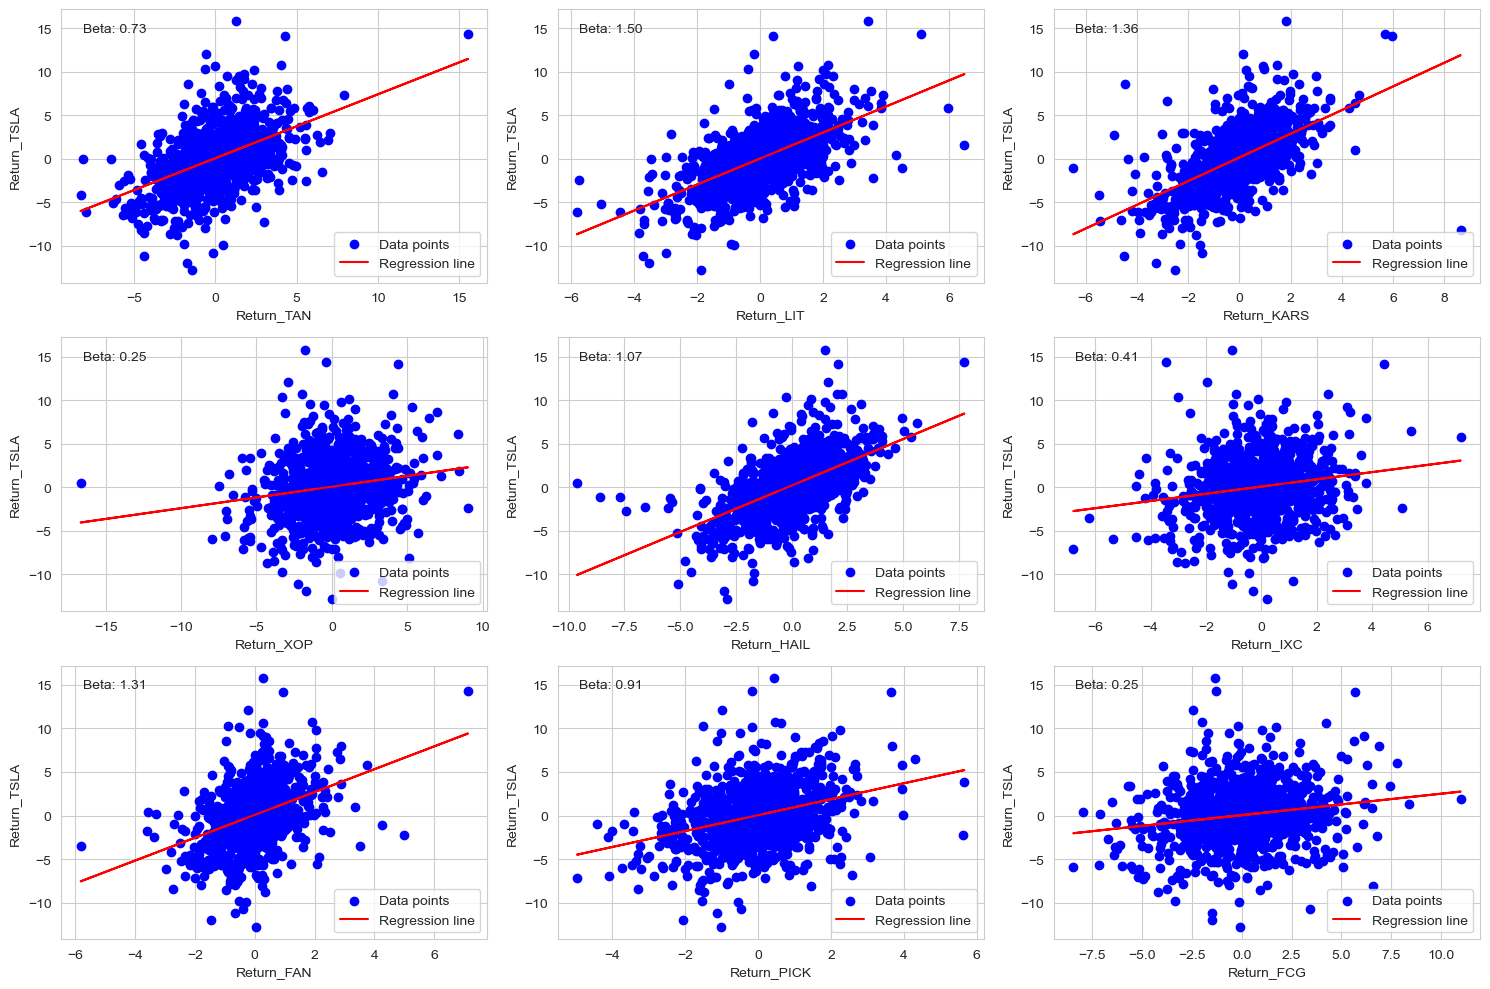

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, etf_name in enumerate(etf_names[:-1]):
    row_index = i // 3
    col_index = i % 3
    
    slope, intercept, _, _, _ = linregress(etfs[f'Return_{etf_name}'], tsla['Return_TSLA'])
    regression_line = slope * etfs[f'Return_{etf_name}'] + intercept
    
    axs[row_index, col_index].scatter(etfs[f'Return_{etf_name}'], tsla['Return_TSLA'], color='blue', label='Data points')
    axs[row_index, col_index].plot(etfs[f'Return_{etf_name}'], regression_line, color='red', label='Regression line')
    axs[row_index, col_index].set_xlabel(f'Return_{etf_name}')
    axs[row_index, col_index].set_ylabel('Return_TSLA')
    axs[row_index, col_index].grid(True)
    axs[row_index, col_index].legend(loc='lower right')
    beta_text = f'Beta: {slope:.2f}'
    axs[row_index, col_index].text(0.05, 0.95, beta_text, ha='left', va='top', transform=axs[row_index, col_index].transAxes, fontsize=10)

plt.tight_layout()
plt.show()


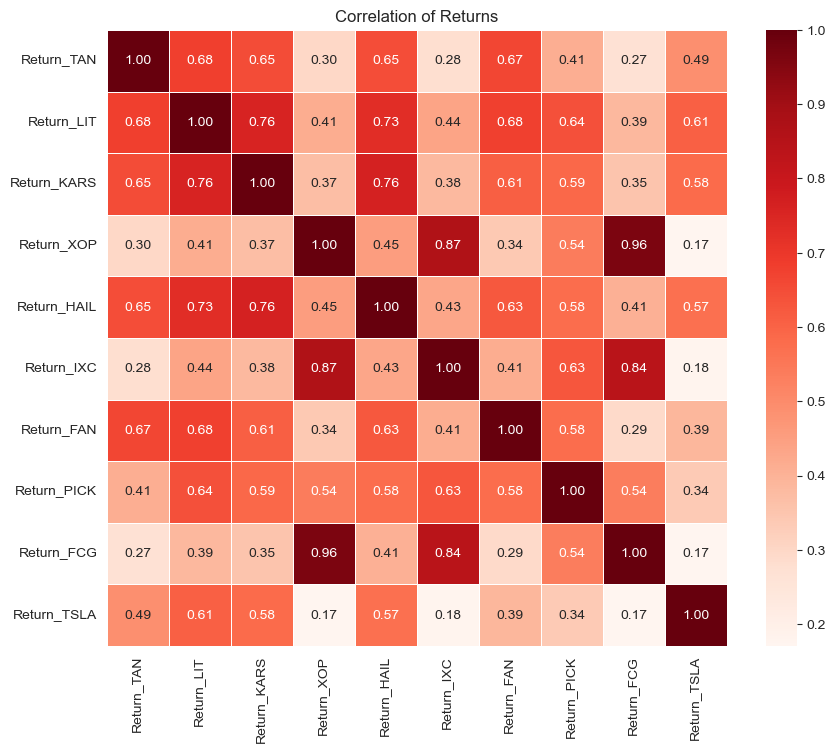

In [9]:
selected_df = etfs[cols].copy()
selected_df["Return_TSLA"] = tsla["Return_TSLA"].copy()

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Returns')
plt.show()

## Logistic Regression Based on Yesterday's return

In [10]:
X_classification = etfs[cols]
y_classification = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

y_classification = y_classification[1:]
X_classification = X_classification[:-1]

len(y_classification), len(X_classification)

(1082, 1082)

In [11]:
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_classification = np.array(y_train_classification)
y_test_classification = np.array(y_test_classification)

classifier = LogisticRegression()
classifier.fit(X_train, y_train_classification)

LogisticRegression()

In [12]:
y_pred_classification = classifier.predict(X_test)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.48847926267281105


## Random Forest Based on Yesterday's return

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
random_forest_model.fit(X_train, y_train_classification)

RandomForestClassifier(max_depth=3, random_state=42)

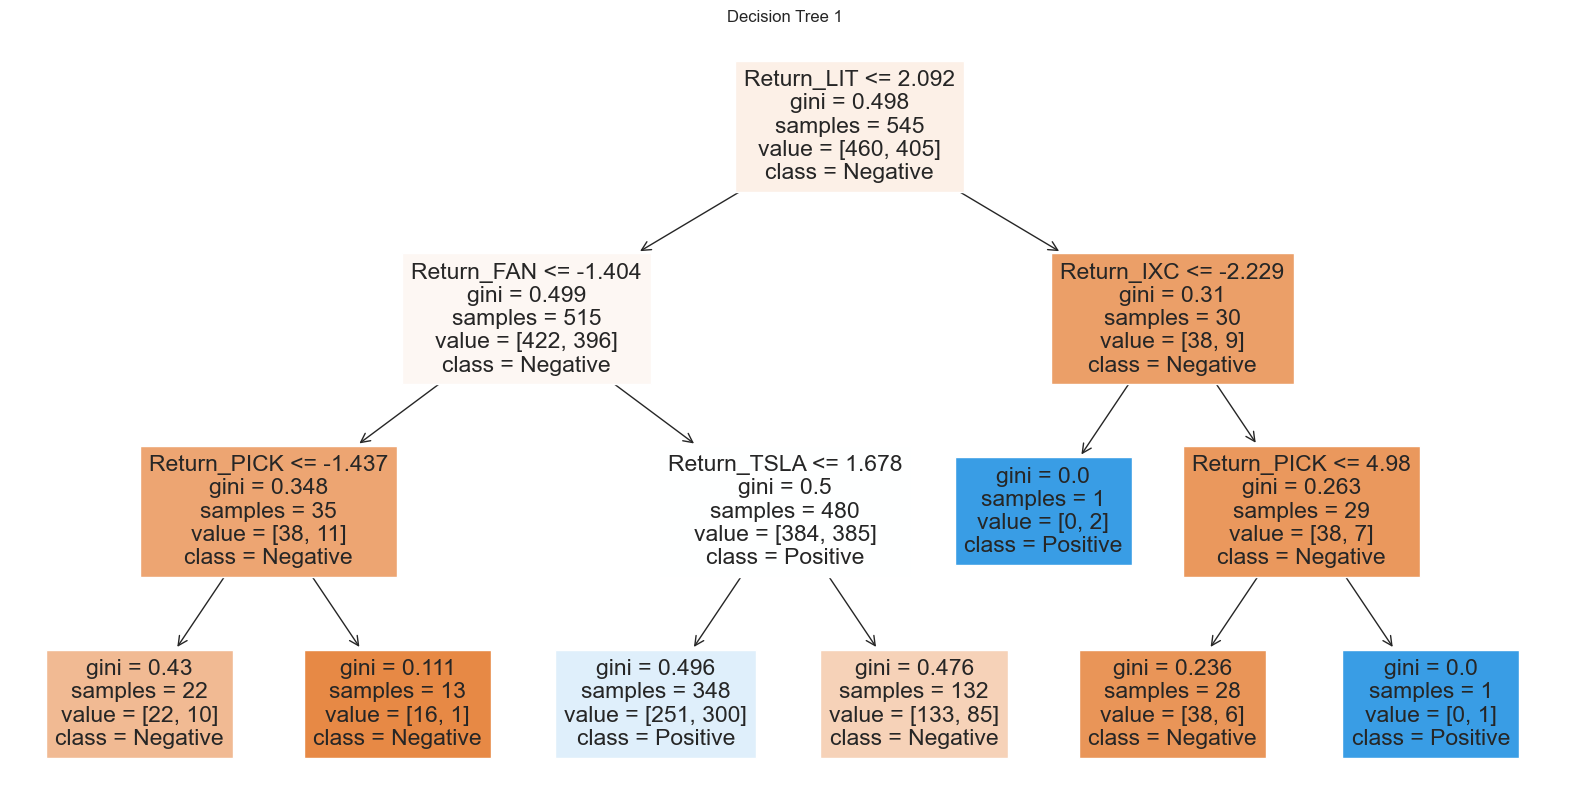

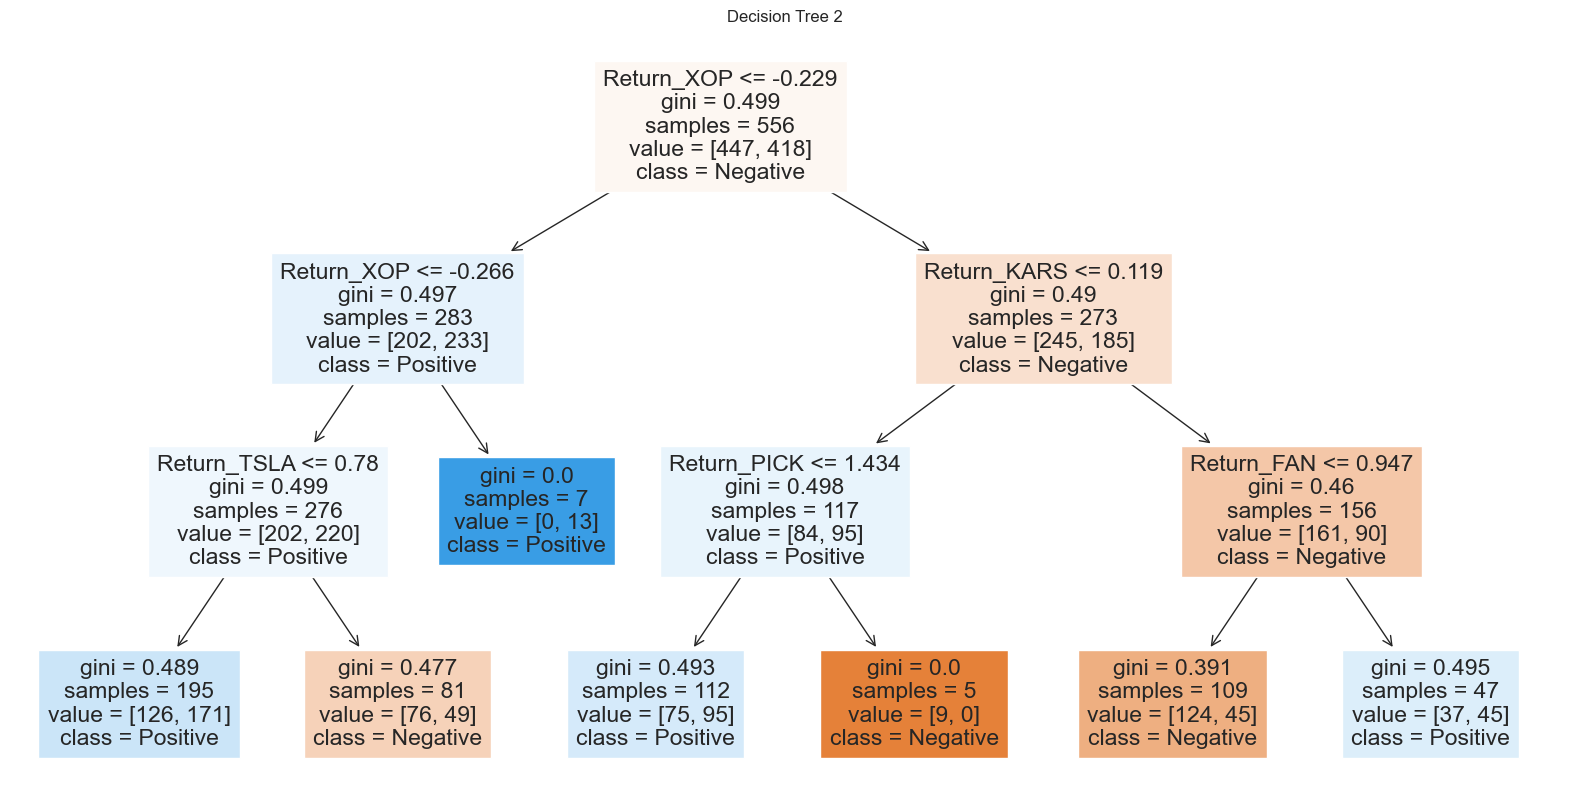

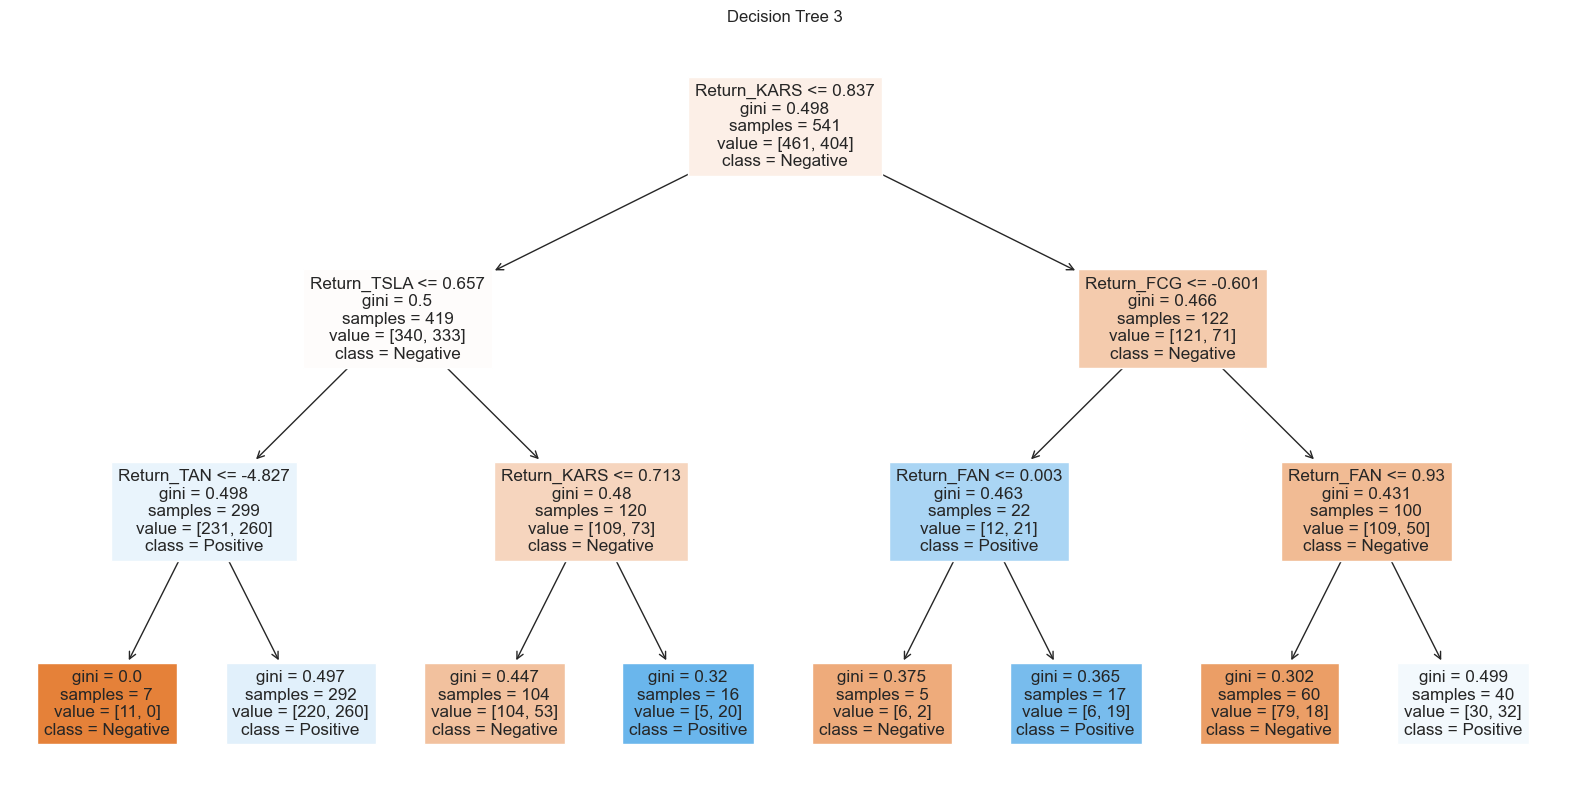

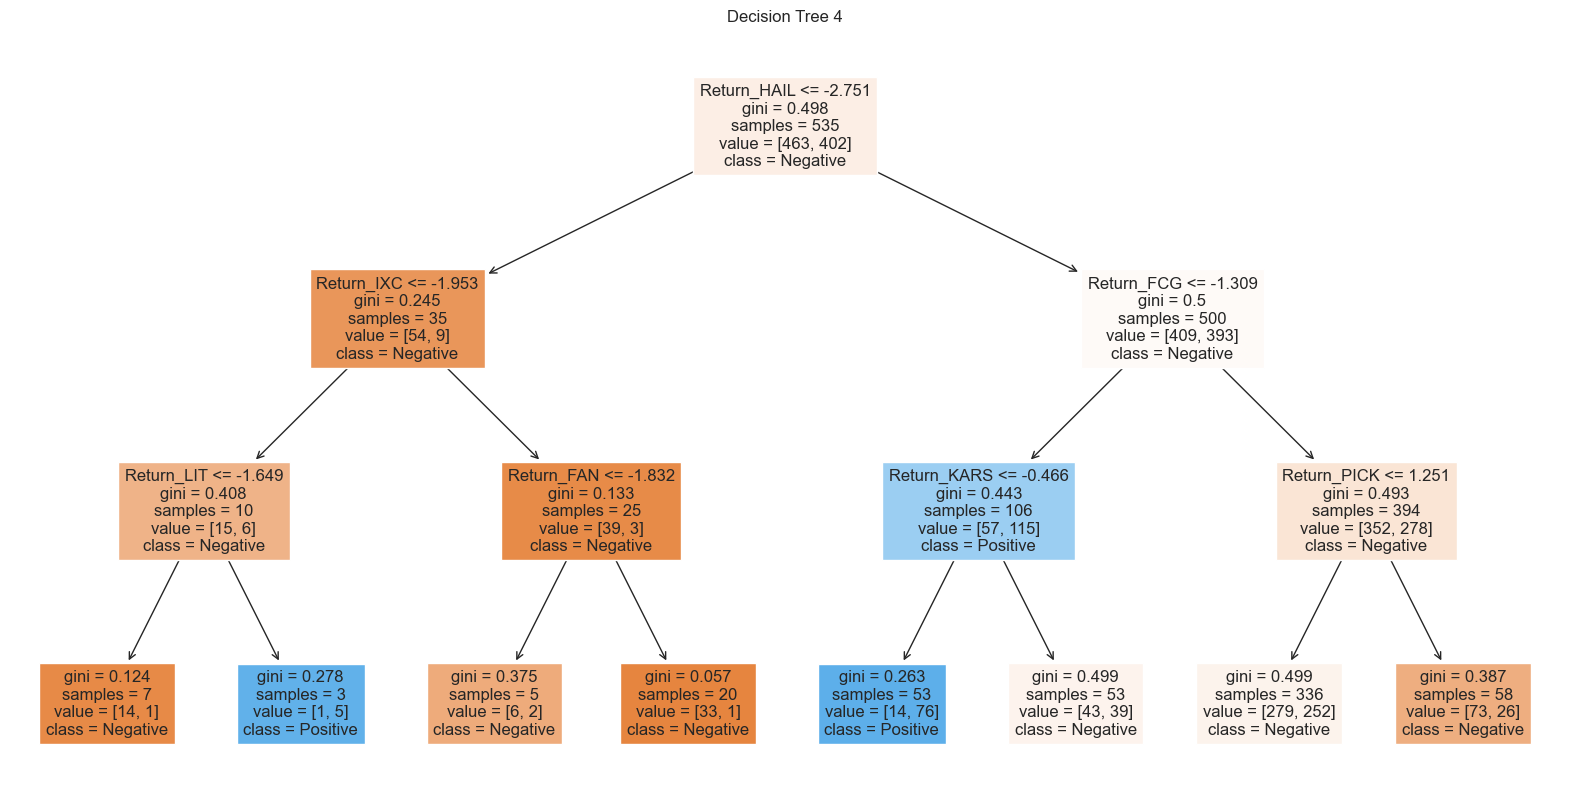

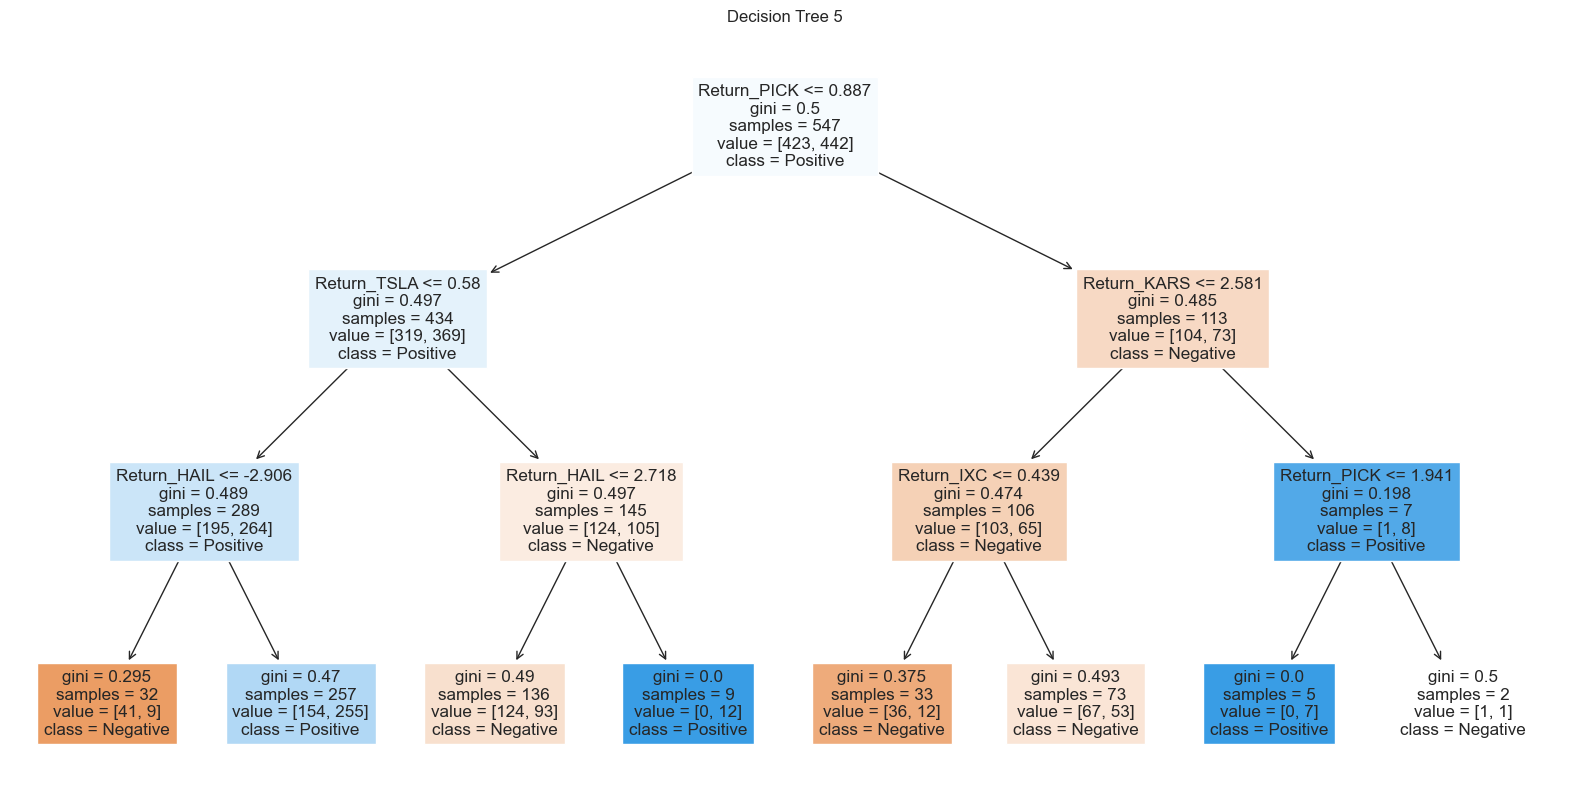

In [14]:
# Define the number of trees to plot
num_trees_to_plot = 5

# Plot the first 'num_trees_to_plot' decision trees in the Random Forest
for i in range(num_trees_to_plot):
    plt.figure(figsize=(20, 10))  # Set the figure size
    plot_tree(random_forest_model.estimators_[i], feature_names=cols, class_names=["Negative", "Positive"], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

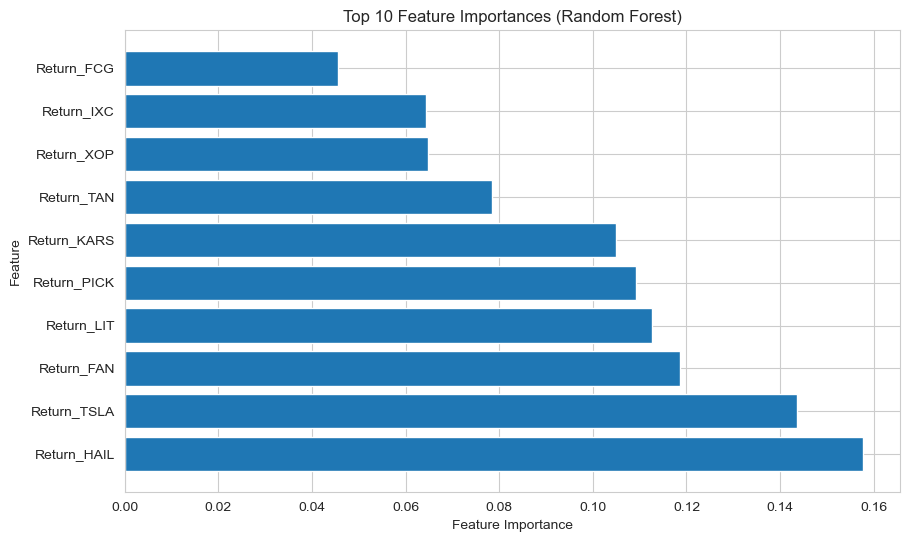

In [15]:
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [16]:
y_pred_classification = random_forest_model.predict(X_test)


randomtree_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.5391705069124424


## Gradient Boosting Classifier Based on Yesterday's return

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train_classification)

GradientBoostingClassifier(random_state=42)

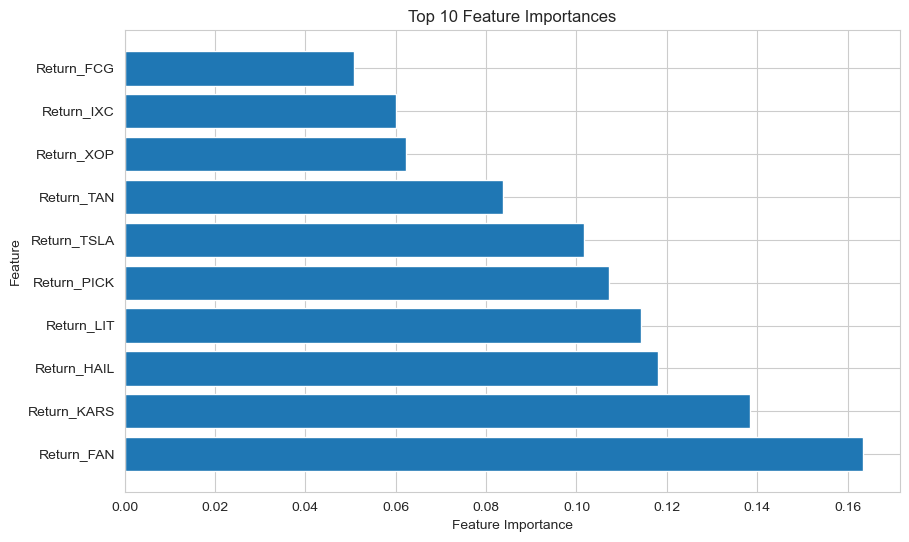

In [18]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [19]:
y_pred_classification = gbm_classifier.predict(X_test)


gbm_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.5391705069124424


## k-NN Based on Yesterday's return

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_classification)

KNeighborsClassifier()

In [21]:
y_pred_classification = knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.48847926267281105


In [22]:
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary for a k-NN classifier
def plot_decision_boundary(X, y, classifier, title):
    h = 0.02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colormap for decision regions
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold colormap for data points

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

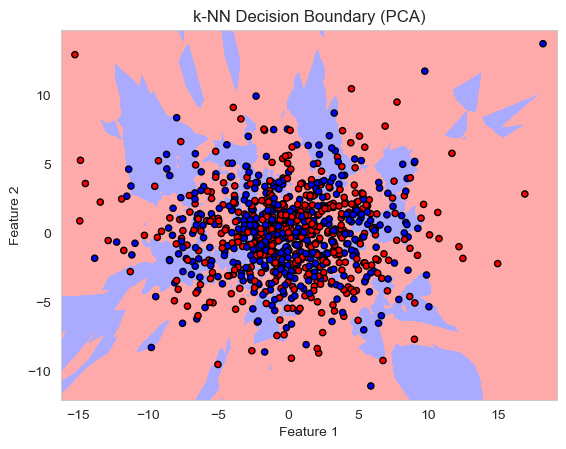

In [23]:
from sklearn.decomposition import PCA

# Reduce dimensionality of input data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn_pca_classifier = KNeighborsClassifier(n_neighbors=10)
knn_pca_classifier.fit(X_train_pca, y_train_classification)
# Plot decision boundary using reduced-dimensional input data
plot_decision_boundary(X_train_pca, y_train_classification, knn_pca_classifier, title='k-NN Decision Boundary (PCA)')

## Neural Networks Based on Yesterday's return

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train.shape[1] is the number of features
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_classification, epochs=10, batch_size=32, validation_split=0.2)  # Assuming 10 epochs and batch size of 32

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
22/22 [==============================] - 1s 18ms/step - loss: 0.6940 - accuracy: 0.5491 - val_loss: 0.7264 - val_accuracy: 0.4624
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5679 - val_loss: 0.7244 - val_accuracy: 0.4509
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5824 - val_loss: 0.7206 - val_accuracy: 0.4393
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.5882 - val_loss: 0.7175 - val_accuracy: 0.4393
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.5939 - val_loss: 0.7152 - val_accuracy: 0.4566
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6069 - val_loss: 0.7220 - val_accuracy: 0.4335
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6084 - val_loss: 0.7166 - val_accuracy: 0.4566
Epoch 8/10
22/22 [=

## Logistic Regression Based on n days rolling window

In [25]:
X_classification_2 = etfs[cols_2]
y_classification_2 = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

X_classification_2 = X_classification_2[window_size-1:-1]
y_classification_2 = y_classification_2[window_size:]

len(y_classification_2), len(X_classification_2)

(1081, 1081)

In [26]:
X_train_2, X_test_2, y_train_classification_2, y_test_classification_2 = train_test_split(X_classification_2, y_classification_2, test_size=0.2, random_state=42)

X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_classification_2 = np.array(y_train_classification_2)
y_test_classification_2 = np.array(y_test_classification_2)

classifier = LogisticRegression()
classifier.fit(X_train_2, y_train_classification_2)

LogisticRegression()

In [27]:
y_pred_classification_2 = classifier.predict(X_test_2)
classification_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.4976958525345622


## Random Forest Model Based on n days rolling window

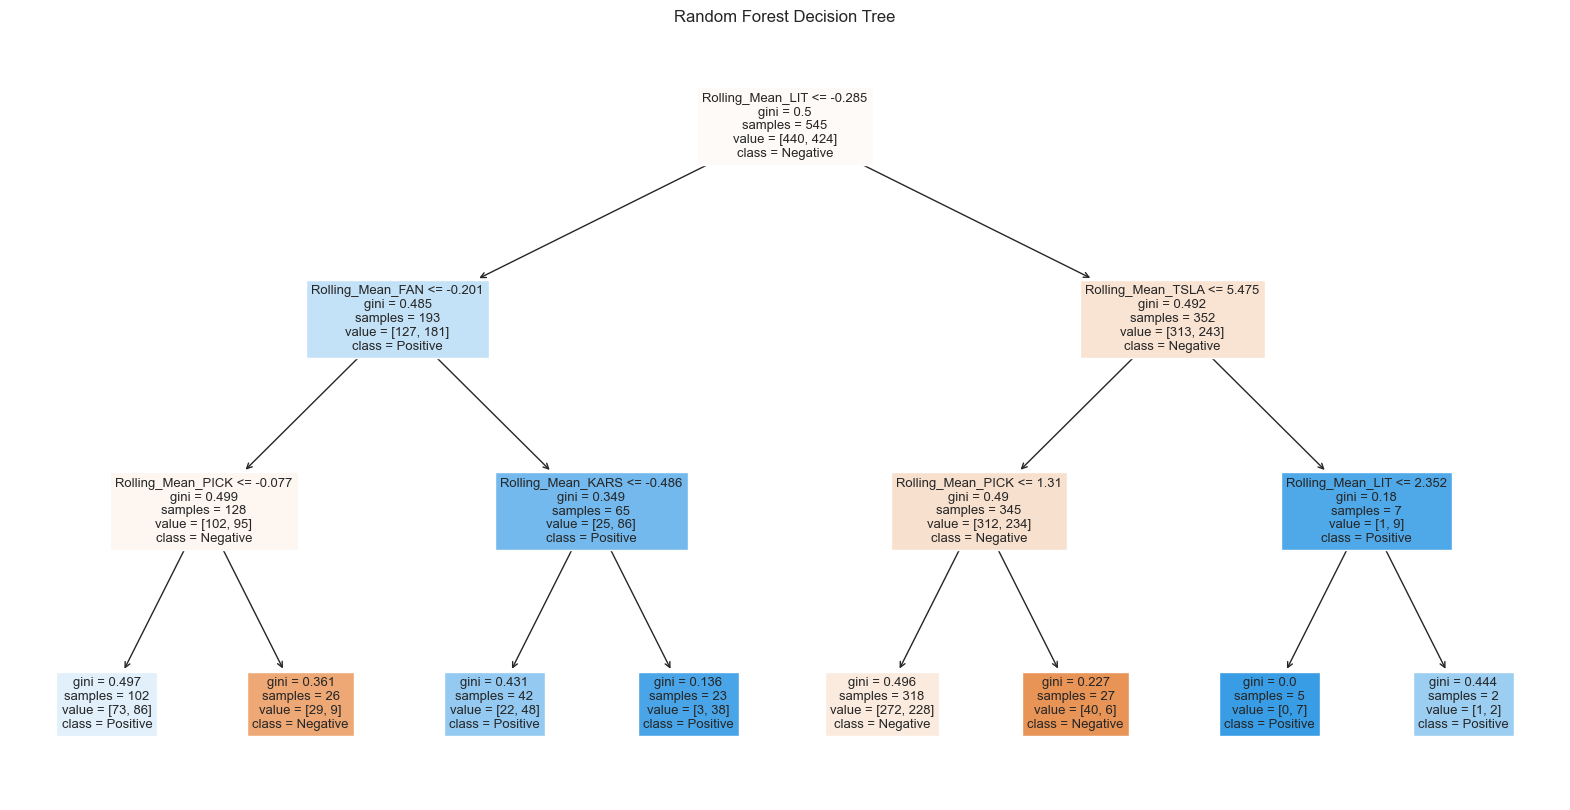

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(X_train_2, y_train_classification_2)


plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=cols_2, class_names=['Negative', 'Positive'], filled=True)
plt.title('Random Forest Decision Tree')
plt.show()

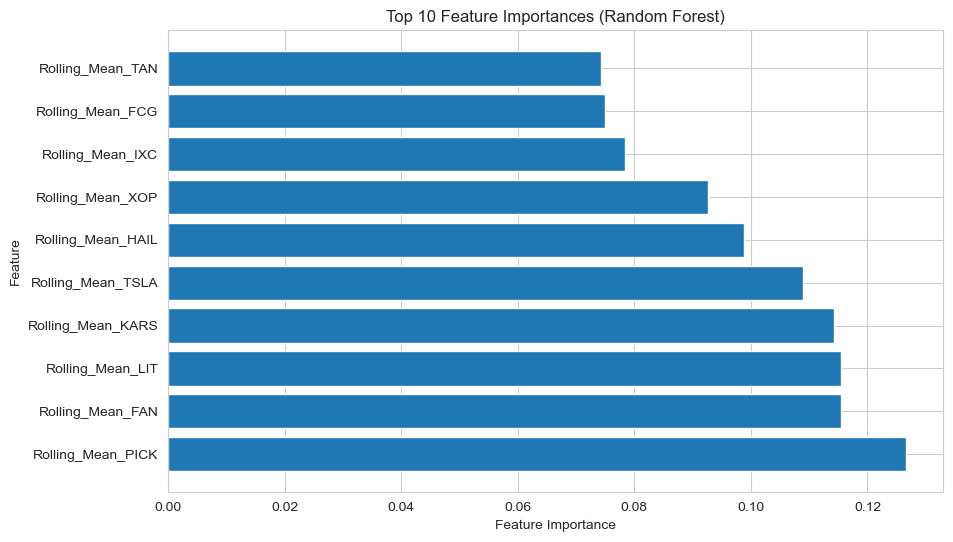

In [29]:
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [30]:
y_pred_classification_2 = rf_classifier.predict(X_test_2)


randomtree_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.47465437788018433


## Gradient Boosting Classifier Based on n days rolling window

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_2, y_train_classification_2)

GradientBoostingClassifier(random_state=42)

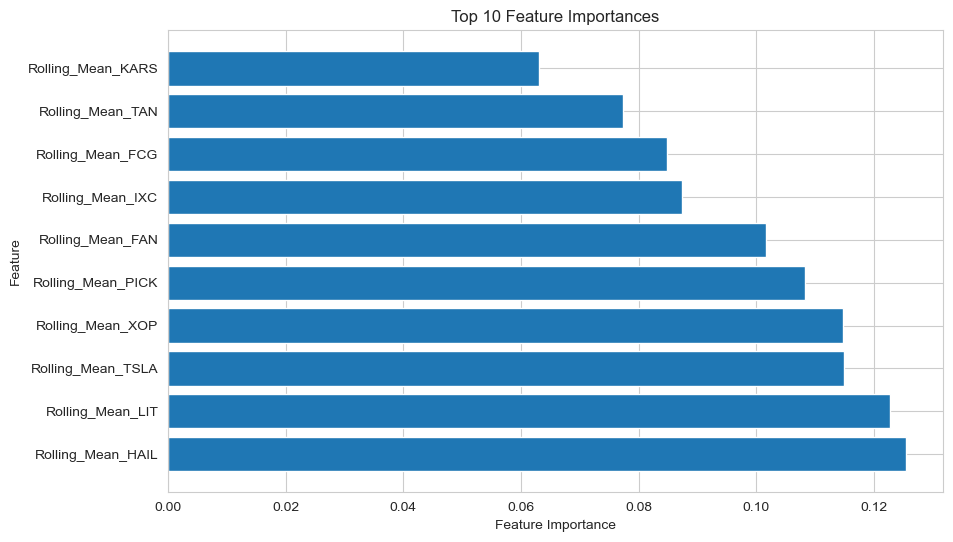

In [32]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [33]:
y_pred_classification_2 = gbm_classifier.predict(X_test_2)


gbm_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.5023041474654378


## k-NN Based on n days rolling window

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_2, y_train_classification_2)

KNeighborsClassifier()

In [35]:
y_pred_classification_2 = knn_classifier.predict(X_test_2)


knn_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.45161290322580644


## Neural Networks Based on n days rolling window

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_2,y_train_classification_2, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_2, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
22/22 [==============================] - 1s 23ms/step - loss: 0.7068 - accuracy: 0.5137 - val_loss: 0.7174 - val_accuracy: 0.4451
Epoch 2/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5210 - val_loss: 0.7164 - val_accuracy: 0.4566
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5268 - val_loss: 0.7142 - val_accuracy: 0.5029
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5601 - val_loss: 0.7145 - val_accuracy: 0.5029
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5630 - val_loss: 0.7152 - val_accuracy: 0.4913
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5731 - val_loss: 0.7158 - val_accuracy: 0.5029
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.5601 - val_loss: 0.7198 - val_accuracy: 0.4913
Epoch 8/20
22/22 [=

## LSTM Based on n days short memory

In [37]:
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define your time_steps
time_steps = 10

# Create sequences from data
X_seq, y_seq = create_sequences(X_classification, y_classification, time_steps)

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

7/7 [==============================] - 0s 4ms/step - loss: 0.4838
Test MSE: 0.48380017280578613


In [39]:
# Make predictions
y_pred = model.predict(X_test)


7/7 [==============================] - 0s 3ms/step


In [40]:
#accuracy
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5209302325581395
